# HEART HEALTH ANALYSIS AND PREDICTION

In [1]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORTING THE DATASET USING PANDAS DATAFRAME
heart = pd.read_csv("Heart_health.csv")
heart.head()

,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1


In [3]:
#HECKING NUMBER OF ROWS AND COLUMN OF THE DATASET
print("Number of rows:", heart.shape[0])
print("Number of columns:", heart.shape[1])

Number of rows: 714
Number of columns: 11


In [4]:
#CHECKING THE PRESENCE OF NULL VALUES
heart.isnull().sum()

Name                    0
Age                     0
Gender                  0
Height(cm)              0
Weight(kg)              0
Blood Pressure(mmHg)    0
Cholesterol(mg/dL)      0
Glucose(mg/dL)          0
Smoker                  0
Exercise(hours/week)    0
Heart Attack            0
dtype: int64

In [5]:
#NUMBER OF DUPLICATES PRESENT
print("Number of duplicates present:", heart.duplicated().sum())

Number of duplicates present: 535


In [6]:
#DROPPING THE DUPLICATES FROM THE DATASET
heart = heart.drop_duplicates()

In [7]:
#CONFIRMING IF THERE ARE DUPLICATES LEFT
print("Are there any duplicates:", heart.duplicated().any())

Are there any duplicates: False


In [8]:
#CHECKING NUMBER OF ROWS AND COLUMN AFTER REMOVING DUPLICATES
print("Number of rows:", heart.shape[0])
print("Number of columns:", heart.shape[1])

Number of rows: 179
Number of columns: 11


In [9]:
#splitting a column into two and changing its data type
heart["Blood Pressure(mmHg)"].str.split("/",2,expand=True)
heart[["Systolic pressure(mm/Hg)", "Diastolic pressure(mm/Hg)"]] = (
    heart["Blood Pressure(mmHg)"].str.split("/",2,expand=True).astype("int")
)

In [10]:
#INFORMATION ON THE DATASET
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 468
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name                       179 non-null    object
 1   Age                        179 non-null    int64 
 2   Gender                     179 non-null    object
 3   Height(cm)                 179 non-null    int64 
 4   Weight(kg)                 179 non-null    int64 
 5   Blood Pressure(mmHg)       179 non-null    object
 6   Cholesterol(mg/dL)         179 non-null    int64 
 7   Glucose(mg/dL)             179 non-null    int64 
 8   Smoker                     179 non-null    object
 9   Exercise(hours/week)       179 non-null    int64 
 10  Heart Attack               179 non-null    int64 
 11  Systolic pressure(mm/Hg)   179 non-null    int32 
 12  Diastolic pressure(mm/Hg)  179 non-null    int32 
dtypes: int32(2), int64(7), object(4)
memory usage: 18.2+ KB


In [11]:
#DESCRIPTIVE SUMMARY OF NUMERIC COLUMNS
heart.describe()

,Age,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack,Systolic pressure(mm/Hg),Diastolic pressure(mm/Hg)
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,45.229050,170.977654,75.670391,204.608939,91.011173,2.653631,0.564246,121.581006,77.513966
std,8.649741,7.434323,7.580116,13.986877,5.710220,0.931729,0.497246,5.846143,4.133119
min,30.000000,155.000000,60.000000,170.000000,75.000000,1.000000,0.000000,105.000000,65.000000
25%,38.000000,166.000000,70.000000,195.000000,88.000000,2.000000,0.000000,118.000000,75.000000
50%,45.000000,170.000000,75.000000,205.000000,92.000000,3.000000,1.000000,122.000000,78.000000
75%,53.000000,177.500000,81.500000,215.000000,96.000000,3.000000,1.000000,125.000000,80.000000
max,60.000000,183.000000,89.000000,230.000000,100.000000,4.000000,1.000000,135.000000,85.000000


In [12]:
#SAVING THE CLEANED DATASET
heart.to_csv("hearthealth.csv")

In [13]:
heart["Gender"] = heart["Gender"].astype("category").cat.codes
#heart["Gender"] = heart["Gender"].cat.codes

In [14]:
heart["Smoker"] = heart["Smoker"].astype("category").cat.codes
#heart["Smoker"] = heart["Smoker"].cat.codes

In [15]:
#TOP 5 ROWS
heart.head()

,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Systolic pressure(mm/Hg),Diastolic pressure(mm/Hg)
0,John Doe,45,1,175,80,120/80,200,90,0,3,0,120,80
1,Jane Smith,35,0,160,65,110/70,180,80,0,2,0,110,70
2,Michael Johnson,55,1,180,85,130/85,220,95,1,4,1,130,85
3,Sarah Brown,40,0,165,70,115/75,190,85,0,3,0,115,75
4,David Lee,50,1,170,75,125/80,210,92,1,2,1,125,80


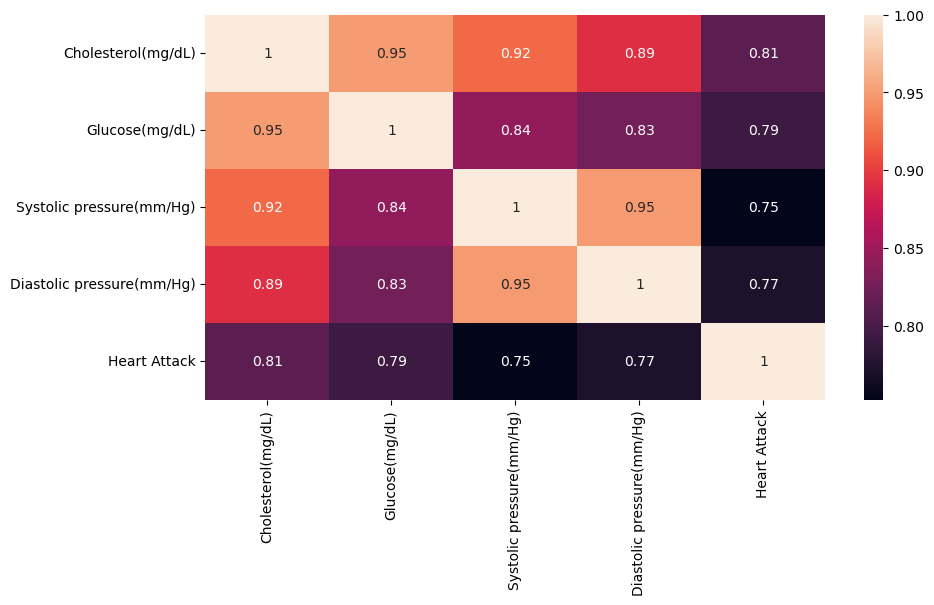

In [16]:
#CORRELATIONS BETWWEEN NUMERIC COLUMNS 
plt.figure(figsize=(10,5))
sns.heatmap(
    heart[["Cholesterol(mg/dL)", "Glucose(mg/dL)", "Systolic pressure(mm/Hg)",
           "Diastolic pressure(mm/Hg)","Heart Attack"]].corr(), annot=True);

In [17]:
#IMPORTING DATA MODELLING TOOLS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
#SELECTING COLUMNS FOR LOGISTIC REGRESSION
health = heart[["Age", "Gender", "Height(cm)", "Weight(kg)", "Cholesterol(mg/dL)", "Glucose(mg/dL)", "Smoker", 
                "Exercise(hours/week)","Systolic pressure(mm/Hg)", "Diastolic pressure(mm/Hg)", "Heart Attack"]]
health.head()

,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Systolic pressure(mm/Hg),Diastolic pressure(mm/Hg),Heart Attack
0,45,1,175,80,200,90,0,3,120,80,0
1,35,0,160,65,180,80,0,2,110,70,0
2,55,1,180,85,220,95,1,4,130,85,1
3,40,0,165,70,190,85,0,3,115,75,0
4,50,1,170,75,210,92,1,2,125,80,1


In [19]:
#CREATING FEATURE AND TARGET VARIABLES
X = health[health.columns[:-1]].values
y = health[health.columns[-1]].values

In [20]:
#SPLITTING THE ROWS INTO TRAINING AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
#FITTING AND TRANSFORMING 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#CREATING THE MODEL
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [24]:
#PREDICTING FROM THE TRAINING SET
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [25]:
from sklearn.metrics import r2_score

In [26]:
#GIVES INFO ON HOW WELL THE MODEL FIT
r2_score(y_train, y_pred_train)

0.9249122807017545

In [27]:
#PREDICTING HOW WELL THE MODEL WWORKS ON THE TEST SET
y_pred_test = lr_model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0], dtype=int64)

In [28]:
r2_score(y_test, y_pred_test)

1.0